In [110]:
import math
from pathlib import Path
from IPython.display import display, Math, Image

import numba
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

plt.rcParams['text.usetex'] = True

def data_directory() -> Path:
    return Path().cwd() / "data"

# Exercise 1:

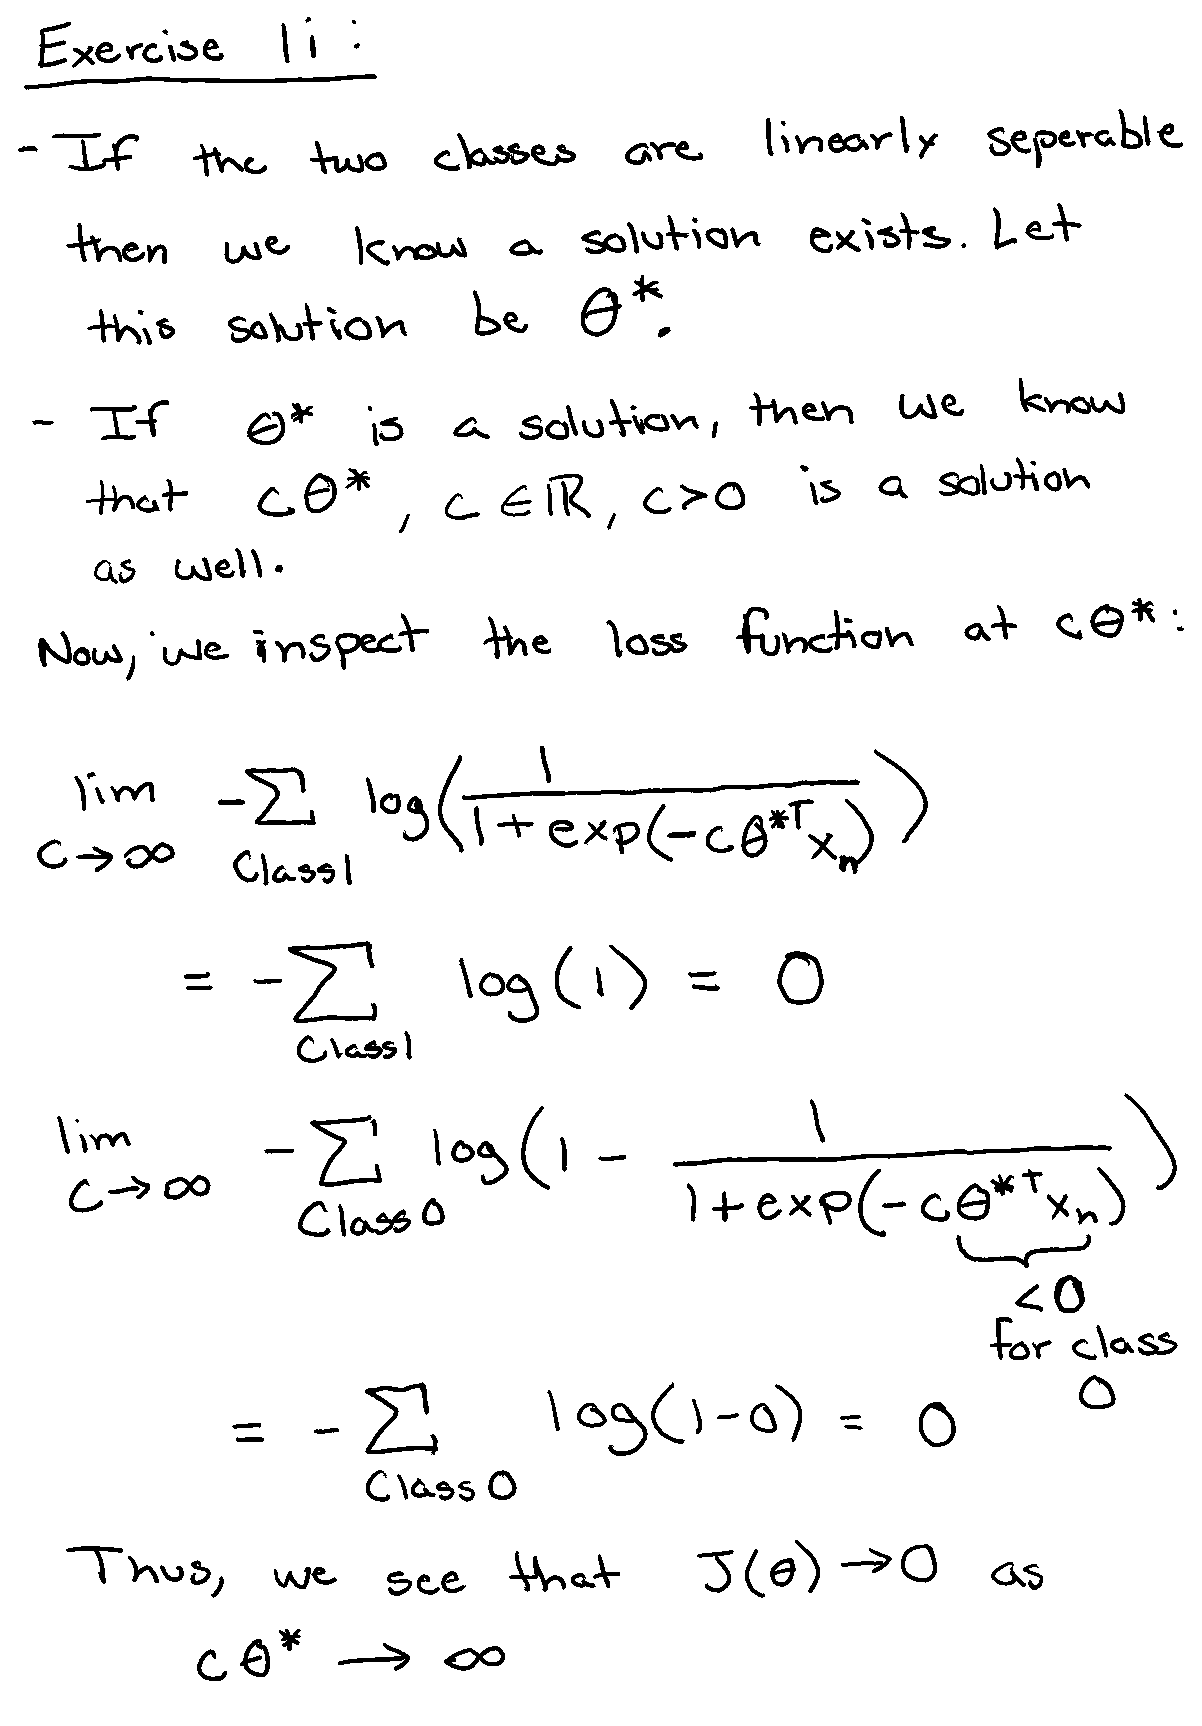

In [111]:
display(Image(filename="./images/hw4_p1i.png", height=400, width=500))

### Problem 1ii:
If we restrict as given in the problem statement, then we will avoid the non-convergence issue. Another way to prevent non-convergence is to add a penalty term like we did with the ridge regression technique.

### Problem 1iii:
The cross-entropy loss is the first time we have encountered non-convergence for linear classifiers.

# Exercise 2:

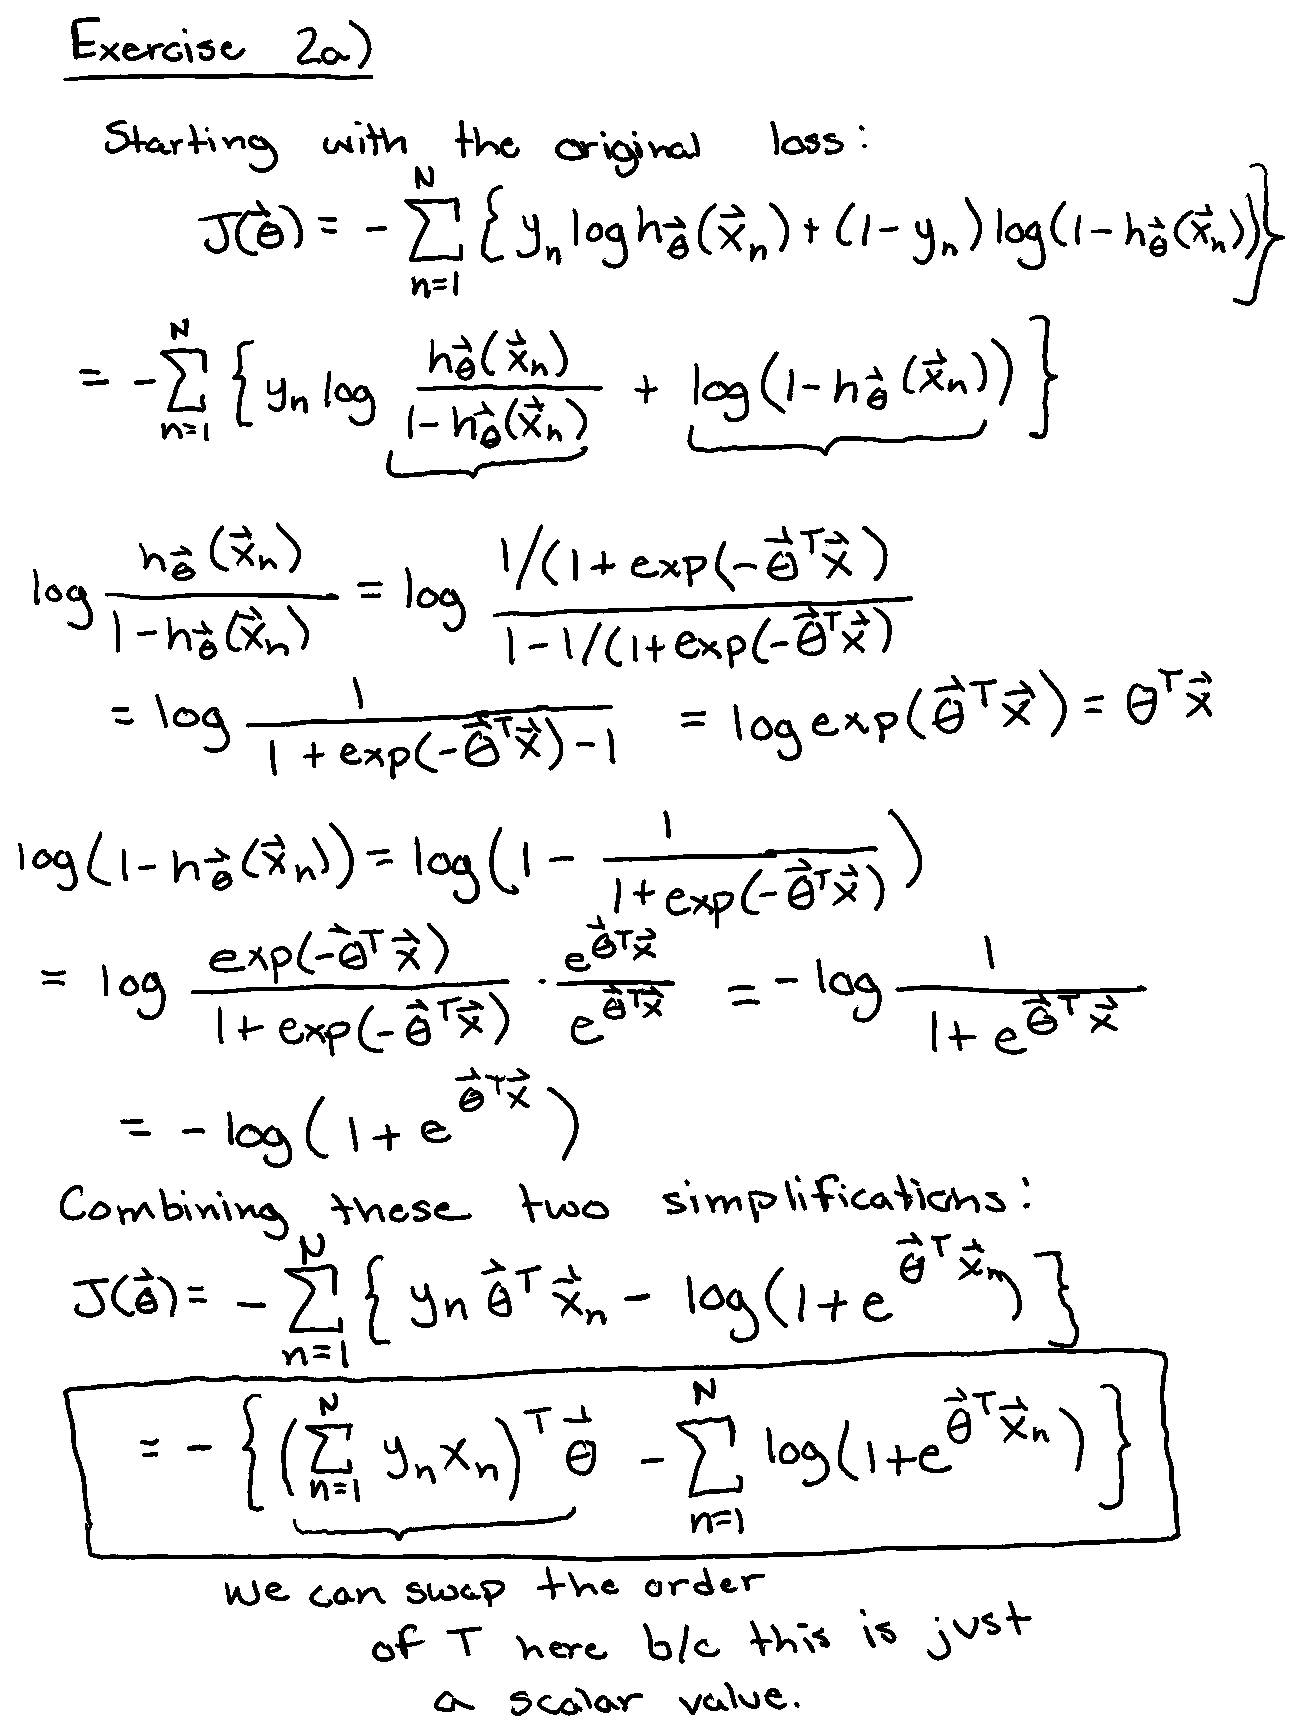

In [112]:
display(Image(filename="./images/hw4_p2a.png", height=400, width=500))

### Problem 2b:

<IPython.core.display.Math object>

[[ 1.15656072]
 [-1.04422467]
 [-0.02547718]]


Text(0, 0.5, 'class 1')

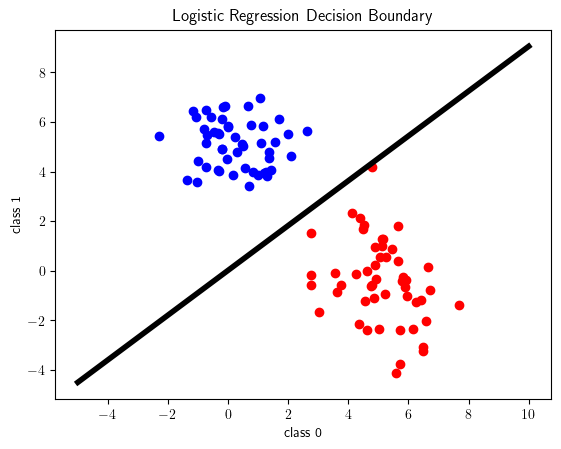

In [113]:
# class0 = np.loadtxt(data_directory() / "homework4_class0.txt")
# class1 = np.loadtxt(data_directory() / "homework4_class1.txt")
class0 = np.loadtxt(data_directory() / "q4_2" / "quiz4_class0.txt")
class1 = np.loadtxt(data_directory() / "q4_2" / "quiz4_class1.txt")
A = np.vstack([class0, class1])
X = np.hstack([A, np.ones((A.shape[0], 1))])
y = np.vstack([np.zeros([class0.shape[0], 1]), np.ones([class1.shape[0], 1])])
y = y.reshape((100, 1))
N = X.shape[0]
lambd = 0.01

# print(f"Class0 Shape: {class0.shape}")
# print(f"Class1 Shape: {class1.shape}")
# print(f"X Shape: {X.shape}")
# print(f"y Shape: {y.shape}")

# Use CVXPY to minimize regularized logistic loss function
theta = cvx.Variable((3, 1))
loss = -cvx.sum(cvx.multiply(y, X @ theta)) \
    + cvx.sum(cvx.log_sum_exp(cvx.hstack([np.zeros((N, 1)), X @ theta]), axis=1))
reg = cvx.sum_squares(theta)
prob = cvx.Problem(cvx.Minimize(loss / N + lambd * reg))

prob.solve()
w = theta.value
display(Math(r"\bf{\hat{\vec{\theta}}}:"))
print(w)

fig = plt.figure()
# Scatter plot the data
plt.scatter(class0[:, 0], class0[:, 1], color="b")
plt.scatter(class1[:, 0], class1[:, 1], color="r")
# Plot the decision boundary
x_axis = np.linspace(-5, 10, 100)
g_w = -w[2] / w[0] - (w[1] / w[0]) * x_axis
plt.plot(x_axis, g_w, "k", linewidth=4)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("class 0")
plt.ylabel("class 1")


### Problem 2d:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[ 1.04365196 -0.10538983]
 [-0.10538983  0.92402059]]


<IPython.core.display.Math object>

[[ 1.19717292 -0.56380775]
 [-0.56380775  2.75477198]]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0, 0.5, 'class 1')

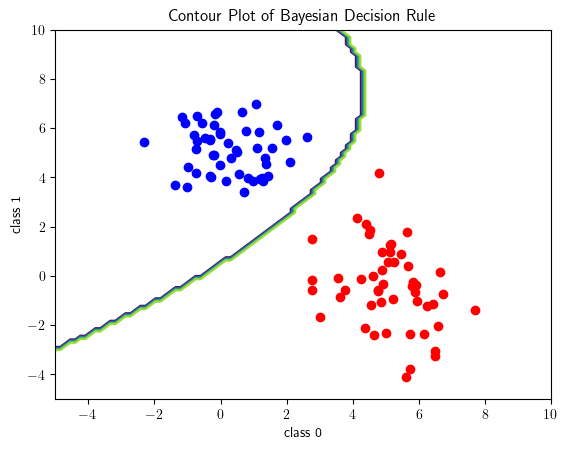

In [114]:
# Estimate means
mu0 = class0.mean(axis=0).reshape((2, 1))
mu1 = class1.mean(axis=0).reshape((2, 1))
display(Math(rf"\mu_0: {mu0}"))
display(Math(rf"\mu_1: {mu1}"))

# Estimate variances
sigma0 = np.cov(class0.T, bias=False)
sigma1 = np.cov(class1.T, bias=False)
display(Math(rf"\Sigma_0:"))
print(sigma0)
display(Math(rf"\Sigma_1:"))
print(sigma1)

# Estimate priors
N0 = class0.shape[0]
N1 = class1.shape[0]
# PI1 and PI2 are the same!
pi0 = N0 / (N0 + N1)
pi1 = N1 / (N0 + N1)
display(Math(rf"\pi_0: {pi0}"))
display(Math(rf"\pi_1: {pi1}"))

# Calculate sigma inverses for decision rule
sigma_0_inv = np.linalg.inv(sigma0)
sigma_1_inv = np.linalg.inv(sigma1)
sigma_0_det = np.linalg.det(sigma0)
sigma_1_det = np.linalg.det(sigma1)

@numba.jit
def make_decision(x0, x1) -> int:
    '''Returns 0/1 depending on classification'''
    x = np.array([x0, x1]).reshape((2, 1))
    xmmu0 = (x - mu0)
    xmmu1 = (x - mu1)
    c0 = -1/2 * xmmu0.T @ sigma_0_inv @ xmmu0 + math.log(pi0) - 1/2 * math.log(sigma_0_det)
    c1 = -1/2 * xmmu1.T @ sigma_1_inv @ xmmu1 + math.log(pi1) - 1/2 * math.log(sigma_1_det)
    return 1 if c1 > c0 else 0

x_axis = np.linspace(-5, 10, 100)
y_axis = np.linspace(-5, 10, 100)
XA, YA = np.meshgrid(x_axis, y_axis)
vfunc = np.vectorize(make_decision)
Z = vfunc(XA, YA)

fig = plt.figure()
plt.scatter(class0[:, 0], class0[:, 1], color="b")
plt.scatter(class1[:, 0], class1[:, 1], color="r")
plt.contour(XA, YA, Z > 0.5)
plt.title("Contour Plot of Bayesian Decision Rule")
plt.xlabel("class 0")
plt.ylabel("class 1")

# Exercise 3:

### Problem 3a:

In [115]:
# kernel function
h = 1
@numba.jit
def kernel(x1, x2):
  return np.exp(-np.sum((x1 - x2)**2) / h)

# Construct kernel matrix K
K  = np.zeros((N,N))
for i in range(N):
  for j in range(N):
    K[i,j] = kernel(X[i], X[j])

display(Math(r"\bf{K[47:52, 47:52]}:"))
print(K[47:52, 47:52])

<IPython.core.display.Math object>

[[1.00000000e+00 5.35715611e-06 4.84149599e-04 4.80194024e-14
  3.78915001e-34]
 [5.35715611e-06 1.00000000e+00 6.14126673e-03 6.17895744e-13
  1.72368387e-28]
 [4.84149599e-04 6.14126673e-03 1.00000000e+00 1.49787585e-05
  1.92800938e-18]
 [4.80194024e-14 6.17895744e-13 1.49787585e-05 1.00000000e+00
  2.70414174e-05]
 [3.78915001e-34 1.72368387e-28 1.92800938e-18 2.70414174e-05
  1.00000000e+00]]


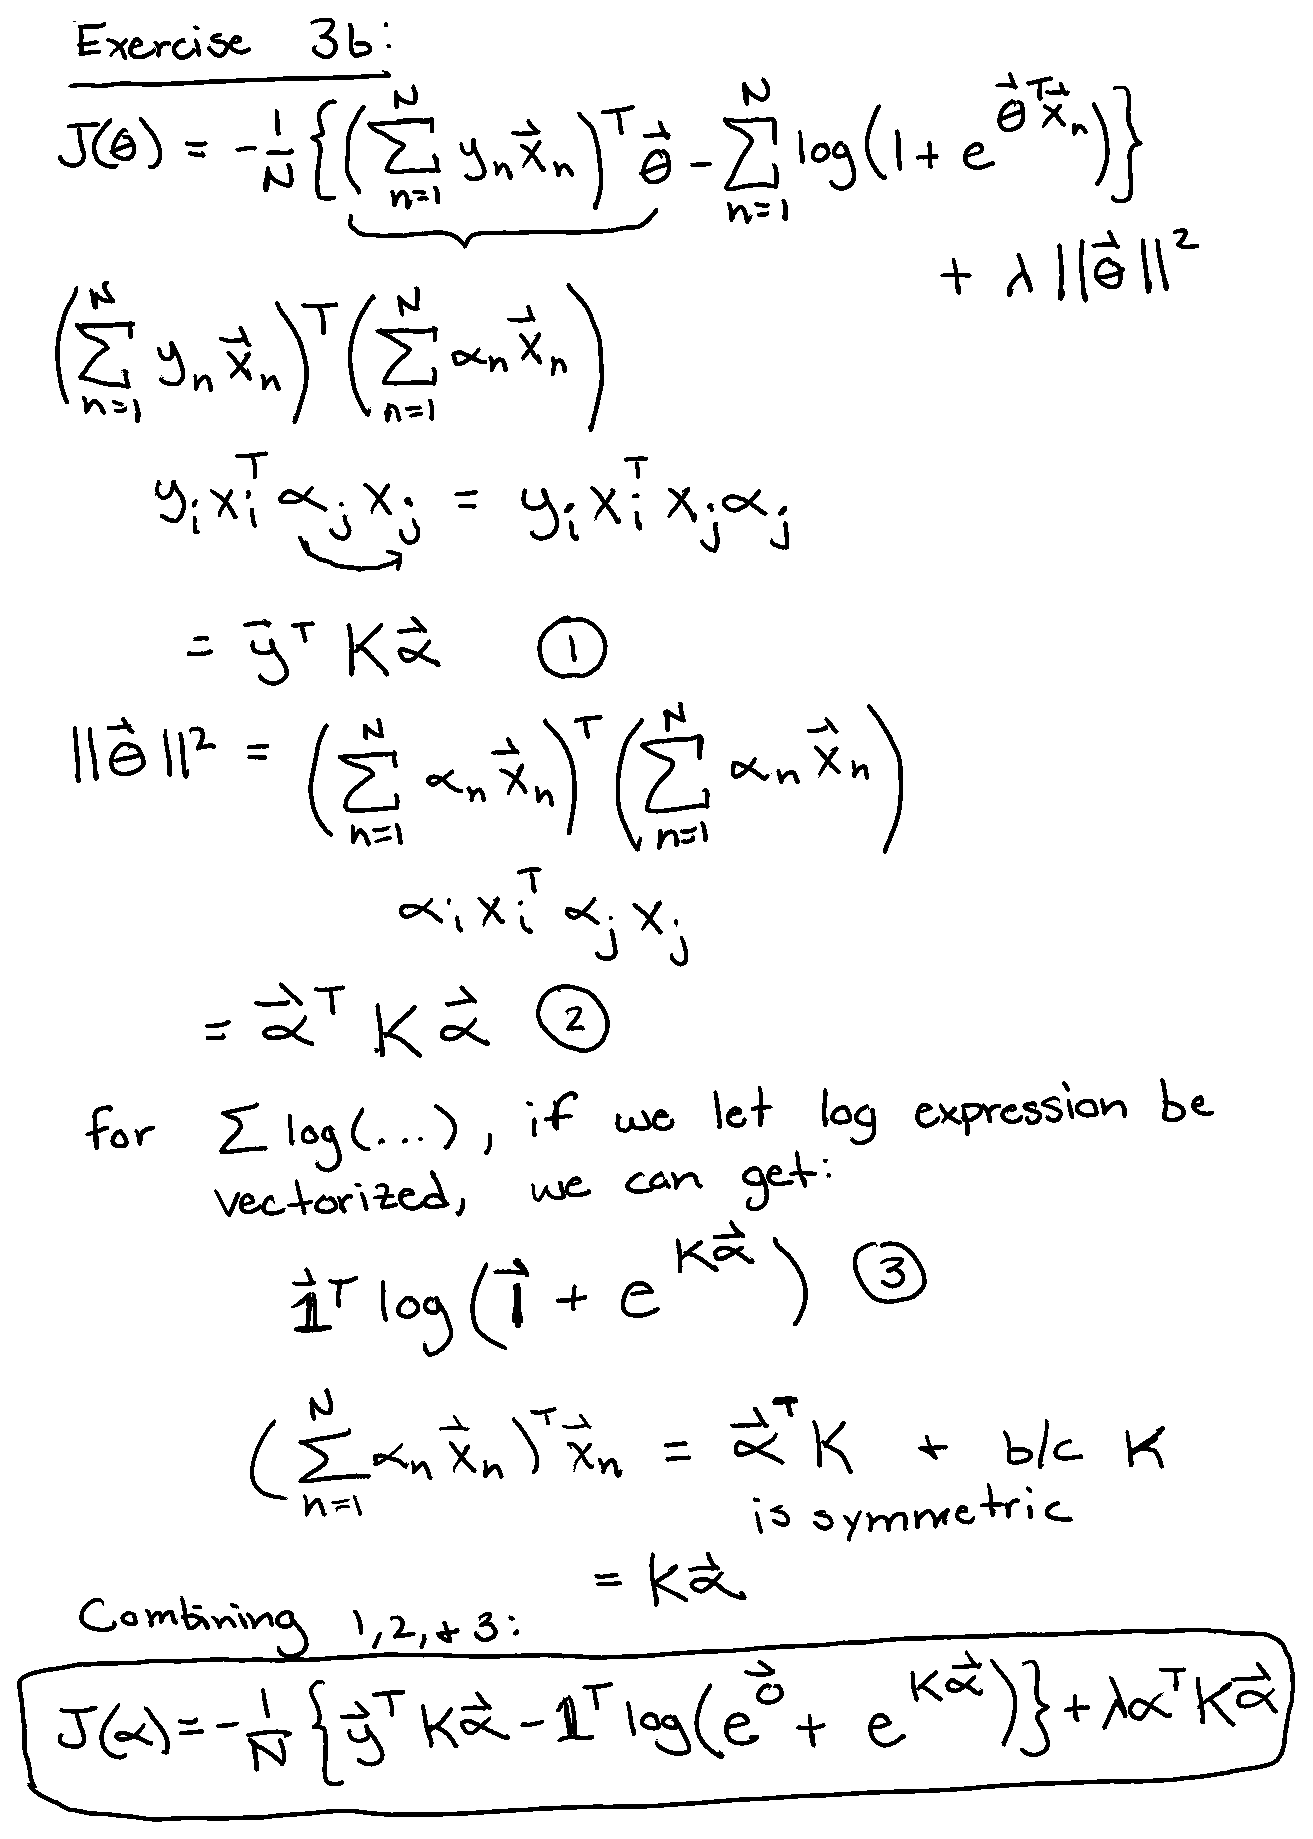

In [116]:
display(Image(filename="./images/hw4_p3b.png", height=400, width=500))

### Problem 3c:

In [117]:
# Use CVXPY to minimize regularized logistic loss function + kernel trick
lambd = 0.01
alpha_cvx = cvx.Variable((N, 1))
#  cvx.sum(cvx.multiply(y, K @ alpha_cvx))
loss = y.T @ K @ alpha_cvx \
    - cvx.sum(cvx.log_sum_exp(cvx.hstack([np.zeros((N, 1)), K @ alpha_cvx]), axis=1))
reg = cvx.quad_form(alpha_cvx, K)
prob = cvx.Problem(cvx.Minimize((-1/N) * loss + lambd * reg))

prob.solve()
alpha = alpha_cvx.value
display(Math(r"\vec{\bf{\alpha}}:"))
print(alpha[0:2])


ArpackNoConvergence: ARPACK error -1: No convergence (1001 iterations, 0/1 eigenvectors converged)

### Problem 3d:

In [ ]:
@numba.jit
def make_decision_kernel(x0, x1) -> int:
    '''Returns 0/1 depending on classification'''
    x = np.array([x0, x1, 1]).reshape((3, 1))
    sum = 0.0
    for i in range(N):
        data = X[i].reshape((3, 1))
        sum += alpha[i][0] * kernel(data, x)
    return 1 / (1 + np.exp(-sum))

xset = np.linspace(-5, 10, 100)
yset = np.linspace(-5, 10, 100)
XA, YA = np.meshgrid(xset, yset)
vfunc = np.vectorize(make_decision_kernel)
Z = vfunc(XA, YA)

fig = plt.figure()
plt.scatter(class0[:, 0], class0[:, 1], color="b")
plt.scatter(class1[:, 0], class1[:, 1], color="r")
plt.contour(XA, YA, Z > 0.5)
plt.title("Contour Plot of Logistic Regression + Kernel Trick")
plt.xlabel("class 0")
plt.ylabel("class 1")